In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def square_wave(u, nx):
    for i in range(1,nx-1):
        if(i>(nx-1)/4 and i< (nx-1)/2):
            u[i,0] = 2
        else:
            u[i,0] = 0
    
    #bdry
    u[0,:] = 0
    u[nx-1,:] = 0
    
    return u

def line(u, dx, m, b, N):
    nx = np.int(N/dx + 1)
    for i in range(1,nx-1):
        u[i,0] = m*i*dx + b
    u[0,:] = u[1,0]
    u[nx-1,:] = u[nx-2,0]
    return u

In [77]:
def diffusion(nt, nx, T, N, k): #nt,nx are number of intervals, T is max time, N is max position, k is diffusivity
    #dt dx
    dt = T/(nt-1)
    dx = N/(nx-1)
    
    #init u, x
    u = np.zeros((nx,nt))
    x = np.zeros(nx)
    
    # bdry
    
    
    # initial conditions 
    #(square wave)
    #square_wave(u,nx)
    
    #(mx+b)
    line(u,dx,1,.1, N)
    
    
            

    # iterating over time and position
    for i in range(0, nt-1):
        for j in range(0,nx-1):
            u[j,i+1] = u[j,i] + k*(dt/(dx**2))*(u[j+1,i] - 2*u[j,i] + u[j-1,i])
            
    #also x
    for i in range(0,nx):
        x[i] = i*dx
    
    return u,x

In [78]:
def plot_diff(u,x, nt):
    plt.figure()
    color = iter(cm.rainbow(np.linspace(0,10,nt)))
    for i in range(0,nt,10):
        c= next(color)
        plt.plot(x,u[:,i], c=c)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.ylim([-1.0,3.0])
    plt.show()

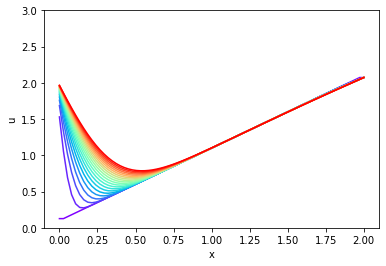

In [79]:
u, x = diffusion(201,76,.5,2.0,.1)
plot_diff(u,x,201)